In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
RANDOM_STATE = 1234

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
df = pd.read_csv('data_mbwithcensus.csv')
df

,mb,area_unit,sa1,occ,vic_sum,Number of dwellings,Number of people,Median age(17),Median personal income($),Number of adults,...,Not Elsewhere Included,"$5,000 or less","$5,001 – $10,000","$10,001 – $20,000","$20,001 – $30,000","$30,001 – $50,000","$50,001 – $70,000","$70,001 or more",Total stated.1,Not stated
0,712101,Point View.,7009059,1,1,63.0,267.0,33.4,27800,222.0,...,0,54,18,27,18,39,27,42,222,0
1,813300,Kingseat.,7010363,1,1,63.0,195.0,46.3,33600,165.0,...,0,24,12,27,15,36,15,36,165,0
2,515203,Waiheke Island.,7003378,1,1,84.0,201.0,44.7,24300,174.0,...,0,21,12,36,24,39,18,18,174,0
3,514800,Glendowie.,7006669,7,7,42.0,111.0,41.2,39100,87.0,...,0,21,3,6,6,12,9,30,87,0
4,763800,Drury.,7010277,1,1,87.0,270.0,42.1,34100,213.0,...,0,27,6,45,24,33,30,51,213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398,516011,Waiheke Island.,7003340,1,1,105.0,234.0,49.0,34600,198.0,...,0,12,12,36,30,36,24,48,198,0
3399,671802,Puhinui North.,7008669,1,1,54.0,204.0,31.3,28300,165.0,...,0,21,12,21,36,39,24,12,165,0
3400,226003,Royal Heights.,7003939,1,1,60.0,267.0,24.9,19600,186.0,...,0,42,12,42,21,39,15,21,186,0
3401,365300,Tuff Crater.,7003109,1,1,36.0,135.0,30.6,28800,105.0,...,0,18,6,18,12,12,21,15,105,0


In [3]:
df2 = df.drop(['sa1','vic_sum'], axis=1)
df2

,mb,area_unit,occ,Number of dwellings,Number of people,Median age(17),Median personal income($),Number of adults,One room,Two rooms,...,Not Elsewhere Included,"$5,000 or less","$5,001 – $10,000","$10,001 – $20,000","$20,001 – $30,000","$30,001 – $50,000","$50,001 – $70,000","$70,001 or more",Total stated.1,Not stated
0,712101,Point View.,1,63.0,267.0,33.4,27800,222.0,0,0,...,0,54,18,27,18,39,27,42,222,0
1,813300,Kingseat.,1,63.0,195.0,46.3,33600,165.0,0,0,...,0,24,12,27,15,36,15,36,165,0
2,515203,Waiheke Island.,1,84.0,201.0,44.7,24300,174.0,0,3,...,0,21,12,36,24,39,18,18,174,0
3,514800,Glendowie.,7,42.0,111.0,41.2,39100,87.0,0,0,...,0,21,3,6,6,12,9,30,87,0
4,763800,Drury.,1,87.0,270.0,42.1,34100,213.0,0,0,...,0,27,6,45,24,33,30,51,213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398,516011,Waiheke Island.,1,105.0,234.0,49.0,34600,198.0,0,3,...,0,12,12,36,30,36,24,48,198,0
3399,671802,Puhinui North.,1,54.0,204.0,31.3,28300,165.0,0,0,...,0,21,12,21,36,39,24,12,165,0
3400,226003,Royal Heights.,1,60.0,267.0,24.9,19600,186.0,0,0,...,0,42,12,42,21,39,15,21,186,0
3401,365300,Tuff Crater.,1,36.0,135.0,30.6,28800,105.0,0,0,...,0,18,6,18,12,12,21,15,105,0


In [4]:
cor = df2.corr()
cor

,mb,occ,Number of dwellings,Number of people,Median age(17),Median personal income($),Number of adults,One room,Two rooms,Three rooms,...,Not Elsewhere Included,"$5,000 or less","$5,001 – $10,000","$10,001 – $20,000","$20,001 – $30,000","$30,001 – $50,000","$50,001 – $70,000","$70,001 or more",Total stated.1,Not stated
mb,1.000000,0.096165,-0.096308,0.059631,-0.177444,-0.163600,0.004633,-0.020973,-0.029083,-0.058442,...,NaN,0.076092,0.023857,0.080996,0.046286,0.093919,-0.014048,-0.189509,0.004633,NaN
occ,0.096165,1.000000,0.103571,0.118889,-0.064601,-0.087651,0.140149,0.127434,0.141941,0.140799,...,NaN,0.098650,0.155775,0.179530,0.119337,0.159648,0.082079,-0.051894,0.140149,NaN
Number of dwellings,-0.096308,0.103571,1.000000,0.752901,0.129067,0.135278,0.828296,0.368859,0.510742,0.637353,...,NaN,0.510449,0.447423,0.496967,0.493077,0.610250,0.631693,0.552791,0.828296,NaN
Number of people,0.059631,0.118889,0.752901,1.000000,-0.188264,-0.146934,0.959803,0.123582,0.193745,0.280435,...,NaN,0.752529,0.627122,0.685228,0.597905,0.792681,0.679266,0.360525,0.959803,NaN
Median age(17),-0.177444,-0.064601,0.129067,-0.188264,1.000000,0.313386,-0.059809,-0.034141,0.003377,0.014010,...,NaN,-0.283744,-0.231790,-0.077582,0.159039,-0.238020,-0.085337,0.304853,-0.059809,NaN
Median personal income($),-0.163600,-0.087651,0.135278,-0.146934,0.313386,1.000000,-0.083940,-0.040171,-0.017240,0.007332,...,NaN,-0.369915,-0.322408,-0.531861,-0.362166,-0.198226,0.229029,0.709120,-0.083940,NaN
Number of adults,0.004633,0.140149,0.828296,0.959803,-0.059809,-0.083940,1.000000,0.190708,0.291256,0.398126,...,NaN,0.752816,0.673524,0.696277,0.630230,0.788290,0.696658,0.430421,1.000000,NaN
One room,-0.020973,0.127434,0.368859,0.123582,-0.034141,-0.040171,0.190708,1.000000,0.758059,0.557115,...,NaN,0.142967,0.206893,0.169992,0.131496,0.156724,0.096117,0.039727,0.190708,NaN
Two rooms,-0.029083,0.141941,0.510742,0.193745,0.003377,-0.017240,0.291256,0.758059,1.000000,0.733017,...,NaN,0.218241,0.250598,0.214260,0.186627,0.227960,0.160511,0.117661,0.291256,NaN
Three rooms,-0.058442,0.140799,0.637353,0.280435,0.014010,0.007332,0.398126,0.557115,0.733017,1.000000,...,NaN,0.303951,0.335164,0.274392,0.237527,0.292363,0.226691,0.192142,0.398126,NaN


<AxesSubplot:>

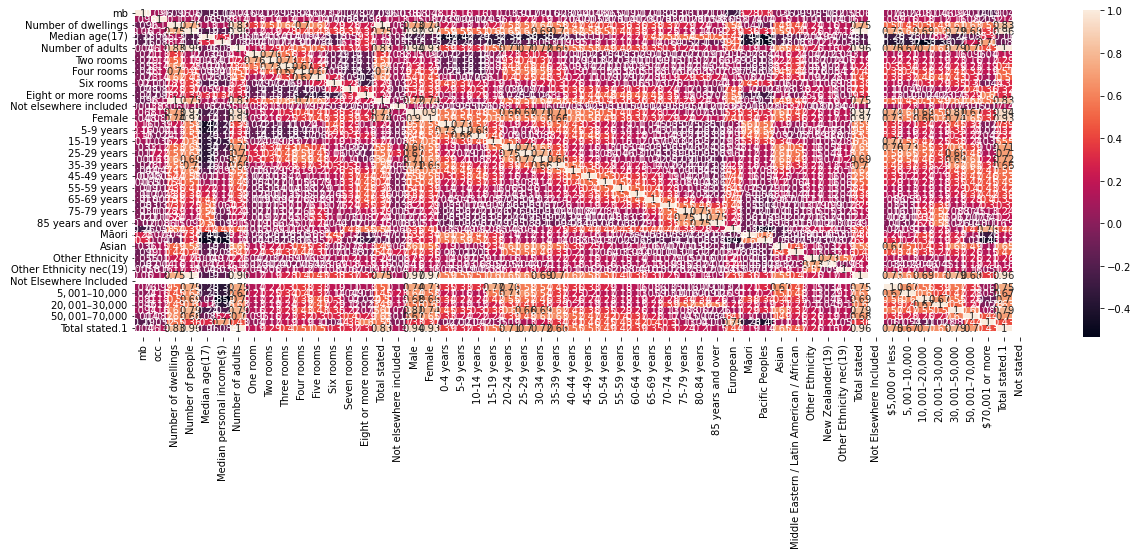

In [5]:
plt.figure(figsize=(20,6))
sns.heatmap(cor, annot=True)

In [6]:
threshold= 0.09
a = abs(cor['occ'])
result = a[a>threshold]
result

mb                                           0.096165
occ                                          1.000000
Number of dwellings                          0.103571
Number of people                             0.118889
Number of adults                             0.140149
One room                                     0.127434
Two rooms                                    0.141941
Three rooms                                  0.140799
Four rooms                                   0.169609
 Five rooms                                  0.144170
Eight or more rooms                          0.098073
 Total stated                                0.102692
 Not elsewhere included                      0.127668
Male                                         0.145402
20-24 years                                  0.123073
25-29 years                                  0.215341
30-34 years                                  0.190125
35-39 years                                  0.115073
Asian                       

In [7]:
df3 = df2[[c for c in df2.columns if c in result]]
df3

,mb,occ,Number of dwellings,Number of people,Number of adults,One room,Two rooms,Three rooms,Four rooms,Five rooms,...,35-39 years,Asian,Middle Eastern / Latin American / African,Total stated,"$5,000 or less","$5,001 – $10,000","$10,001 – $20,000","$20,001 – $30,000","$30,001 – $50,000",Total stated.1
0,712101,1,63.0,267.0,222.0,0,0,0,3,0,...,18,216,6,267,54,18,27,18,39,222
1,813300,1,63.0,195.0,165.0,0,0,0,3,3,...,9,9,3,195,24,12,27,15,36,165
2,515203,1,84.0,201.0,174.0,0,3,3,12,21,...,15,6,12,201,21,12,36,24,39,174
3,514800,7,42.0,111.0,87.0,0,0,0,6,6,...,6,18,0,111,21,3,6,6,12,87
4,763800,1,87.0,270.0,213.0,0,0,3,3,3,...,12,18,3,270,27,6,45,24,33,213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398,516011,1,105.0,234.0,198.0,0,3,3,12,15,...,18,15,3,234,12,12,36,30,36,198
3399,671802,1,54.0,204.0,165.0,0,0,0,6,12,...,12,156,6,204,21,12,21,36,39,165
3400,226003,1,60.0,267.0,186.0,0,0,0,3,6,...,24,24,15,267,42,12,42,21,39,186
3401,365300,1,36.0,135.0,105.0,0,0,0,0,6,...,15,60,3,135,18,6,18,12,12,105


In [9]:
y = df3['occ'].to_numpy()
X = df3.drop(['occ'], axis=1).to_numpy()
print(X.shape, y.shape)


(3403, 26) (3403,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
print(X_train.shape, X_test.shape)

(2722, 26) (681, 26)


In [11]:
pd.value_counts(y_train)

1     1845
2      534
3      198
4       75
5       23
6       12
9        9
7        8
8        6
11       3
13       3
10       2
16       2
15       2
dtype: int64

# Decision Tree

In [42]:
unprued_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
unprued_dt.fit(X_train, y_train)

unprued_dt_scores_cv = cross_val_score(unprued_dt, X_train, y_train, cv=10, n_jobs=-1)
y_pred = unprued_dt.predict(X_test)
print('Accuracy_train: %.3f (%.3f)' % (np.mean(unprued_dt_scores_cv), np.std(unprued_dt_scores_cv)))
print('Accuracy_test: %.3f' % metrics.accuracy_score(y_test, y_pred))

Accuracy_train: 0.506 (0.026)
Accuracy_test: 0.488


E:\anaconda\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [43]:
unprued_dt = DecisionTreeRegressor(random_state=RANDOM_STATE)
unprued_dt.fit(X_train, y_train)

unprued_dt_scores_cv = cross_val_score(unprued_dt, X_train, y_train, cv=10, n_jobs=-1)
y_pred = unprued_dt.predict(X_test)
print('Accuracy_train: %.3f (%.3f)' % (np.mean(unprued_dt_scores_cv), np.std(unprued_dt_scores_cv)))
print('Accuracy_test: %.3f' % metrics.accuracy_score(y_test, y_pred))

Accuracy_train: -0.951 (0.550)
Accuracy_test: 0.518


# Random Forest

In [47]:
rf = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=10)
rf.fit(X_train, y_train)

rf_scores_cv = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1)
y_pred = rf.predict(X_test)
print('Accuracy_train: %.3f (%.3f)' % (np.mean(rf_scores_cv), np.std(rf_scores_cv)))
print('Accuracy_test: %.3f' % metrics.accuracy_score(y_test, y_pred))

Accuracy_train: 0.633 (0.013)
Accuracy_test: 0.620


E:\anaconda\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [48]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state=RANDOM_STATE, max_depth=2)
# rf.fit(X_train, y_train)

# rf_scores_cv = cross_val_score(rf, X_train, y_train, cv=10, n_jobs=-1)
# y_pred = rf.predict(X_test)
# print('Accuracy_train: %.3f (%.3f)' % (np.mean(rf_scores_cv), np.std(rf_scores_cv)))
# print('Accuracy_test: %.3f' % metrics.accuracy_score(y_test, y_pred))

# Ada boosting

In [16]:
ada = AdaBoostClassifier(random_state=RANDOM_STATE, n_estimators=10)
ada.fit(X_train, y_train)

ada_scores_cv = cross_val_score(ada, X_train, y_train, cv=10, n_jobs=-1)
y_pred = ada.predict(X_test)
print('Accuracy_train: %.3f (%.3f)' % (np.mean(ada_scores_cv), np.std(ada_scores_cv)))
print('Accuracy_test: %.3f' % metrics.accuracy_score(y_test, y_pred))

Accuracy_train: 0.677 (0.003)
Accuracy_test: 0.675


E:\anaconda\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


# GradientBoosting

In [22]:
gb_result = []
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
params = [
    {
    'n_estimators': [10, 15, 20],
    #     'learning'
}
]
grid_search = GridSearchCV(gb, params, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

E:\anaconda\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GradientBoostingClassifier(n_estimators=10, random_state=1234)

In [25]:
ada_scores_cv = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=10, n_jobs=-1)
y_pred = ada.predict(X_test)
print('Accuracy_train: %.3f (%.3f)' % (np.mean(ada_scores_cv), np.std(ada_scores_cv)))
print('Accuracy_test: %.3f' % metrics.accuracy_score(y_test, y_pred))

E:\anaconda\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Accuracy_train: 0.668 (0.006)
Accuracy_test: 0.675


# Logistic Regression

In [29]:
lg = LogisticRegression(random_state=RANDOM_STATE)
lg.fit(X_train, y_train)

lg_scores_cv = cross_val_score(lg, X_train, y_train, cv=10, n_jobs=-1)
y_pred = lg.predict(X_test)
print('Accuracy_train: %.3f (%.3f)' % (np.mean(lg_scores_cv), np.std(lg_scores_cv)))
print('Accuracy_test: %.3f' % metrics.accuracy_score(y_test, y_pred))

E:\anaconda\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\anaconda\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Accuracy_train: 0.678 (0.002)
Accuracy_test: 0.675


# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_scores_cv = cross_val_score(knn, X_train, y_train, cv=10, n_jobs=-1)
y_pred = knn.predict(X_test)
print('Accuracy_train: %.3f (%.3f)' % (np.mean(knn_scores_cv), np.std(knn_scores_cv)))
print('Accuracy_test: %.3f' % metrics.accuracy_score(y_test, y_pred))

Accuracy_train: 0.646 (0.012)
Accuracy_test: 0.639


E:\anaconda\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [32]:
pipeline = Pipeline(
    [
        ('kbest',SelectKBest(chi2, k=10)),
        ('model', RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=10))
    ]
)
cv = KFold(n_splits=10, random_state=42, shuffle=True)

pipeline.fit(X_train, y_train)
scores_cv = cross_val_score(pipeline, X_train, y_train, cv=10, n_jobs=-1)
y_pred = pipeline.predict(X_test)
print('Accuracy_train: %.3f (%.3f)' % (np.mean(scores_cv), np.std(scores_cv)))
print('Accuracy_test: %.3f' % metrics.accuracy_score(y_test, y_pred))

Accuracy_train: 0.627 (0.017)
Accuracy_test: 0.624


E:\anaconda\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [36]:
param_grid = [
    {
        'kbest__k': [5, 10, 15, 20],
        'model__max_depth': [10, 20, 30],
    },
]
search = GridSearchCV(pipeline, param_grid, cv=10, n_jobs=-1, scoring='accuracy')
search.fit(X_train, y_train)
print(search.best_estimator_)
print(search.best_score_)
accuracy = search.best_estimator_.score(X_train, y_train)
print('Accuracy_train: %.3f (%.3f)' % (np.mean(accuracy), np.std(accuracy)))

print('Accuracy_test: %.3f' % metrics.accuracy_score(y_test, y_pred))

E:\anaconda\anaconda\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Pipeline(steps=[('kbest',
                 SelectKBest(k=5,
                             score_func=<function chi2 at 0x000002153E1B7940>)),
                ('model',
                 RandomForestClassifier(max_depth=10, n_estimators=10,
                                        random_state=1234))])
0.6667905623787977
Accuracy_train: 0.721 (0.000)
Accuracy_test: 0.624


In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)


print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[1845    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 533    1    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 198    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [  75    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [  23    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [  12    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   8    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   6    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0

E:\anaconda\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = 